In [ ]:
# Import Libraries yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model.xlsx to Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model.xlsx


In [ ]:
!ls

'Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model (1).xlsx'
'Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model (2).xlsx'
'Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model.xlsx'
 sample_data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ganti 'nama_file.xlsx' dengan nama file yang kamu upload
df = pd.read_excel('Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model.xlsx')
print(df.head())


                Timestamp        Nama Lengkap Mahasiswa NIM LENGKAP  \
0 2024-11-07 10:26:20.423   Deby Cynthia Rohara Manalu     11422047   
1 2024-11-12 14:48:02.254               Ruben Sibarani     42224037   
2 2024-11-12 15:28:02.159  Oktova Yoga Praditia Samosir    42324001   
3 2024-11-14 08:44:24.573                Brahmana Purba    42324002   
4 2024-11-11 10:39:12.320       Andre Christian Saragih    11S23026   

                               Fakultas Mahasiswa  \
0                                 Fakultas Vokasi   
1                                 Fakultas Vokasi   
2                                 Fakultas Vokasi   
3                                 Fakultas Vokasi   
4  Fakultas Informatika dan Teknik Elektro (FITE)   

                 Program Studi Mahasiswa   Angkatan  \
0  DIV Teknologi Rekayasa Perangkat Lunak      2022   
1                DIII Teknologi Informasi      2024   
2                DIII Teknologi Informasi      2024   
3                DIII Teknologi In

In [ ]:
# Menampilkan Seluruh Data
df.columns

Index(['Timestamp', 'Nama Lengkap Mahasiswa', 'NIM LENGKAP',
       'Fakultas Mahasiswa', 'Program Studi Mahasiswa ', 'Angkatan',
       'Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya. ',
       'Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri. ',
       'Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan',
       'Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik',
       'Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri',
       'Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami',
       'Saya cenderung memproses informasi dengan cara merenungkan konsep sebelum mengambil tindakan',
       'Saya lebih suka mencoba sesuatu terlebih dahulu dan memikirkannya kemudian',
       'Saya merasa lebih baik belajar melalui praktik langsung daripada hanya membaca atau

In [ ]:
# Menampilkan 5 baris pertama dari dataframe
df.head()

Timestamp        Nama Lengkap Mahasiswa NIM LENGKAP  \
0 2024-11-07 10:26:20.423   Deby Cynthia Rohara Manalu     11422047   
1 2024-11-12 14:48:02.254               Ruben Sibarani     42224037   
2 2024-11-12 15:28:02.159  Oktova Yoga Praditia Samosir    42324001   
3 2024-11-14 08:44:24.573                Brahmana Purba    42324002   
4 2024-11-11 10:39:12.320       Andre Christian Saragih    11S23026   

                               Fakultas Mahasiswa  \
0                                 Fakultas Vokasi   
1                                 Fakultas Vokasi   
2                                 Fakultas Vokasi   
3                                 Fakultas Vokasi   
4  Fakultas Informatika dan Teknik Elektro (FITE)   

                 Program Studi Mahasiswa   Angkatan  \
0  DIV Teknologi Rekayasa Perangkat Lunak      2022   
1                DIII Teknologi Informasi      2024   
2                DIII Teknologi Informasi      2024   
3                DIII Teknologi Informasi      2024   
4                          S1 Informatika      2024   

  Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.   \
0                                             Setuju                               
1                                             Setuju                               
2                                             Setuju                               
3                                             Setuju                               
4                                      Sangat setuju                               

  Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.   \
0                                             Netral                                                        
1                                             Netral                                                        
2                                             Setuju                                                        
3                                             Netral                                                        
4                                      Sangat setuju                                                        

  Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan  \
0                                             Setuju                              
1                                             Setuju                              
2                                             Setuju                              
3                                             Netral                              
4                                      Sangat setuju                              

  Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik  \
0                                             Setuju                                     
1                                             Setuju                                     
2                                             Setuju                                     
3                                             Setuju                                     
4                                      Sangat setuju                                     

  Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri  \
0                                             Netral                                               
1                                             Setuju                                               
2                                             Setuju                                               
3                                             Netral                                               
4                                      Sangat setuju                                               

  Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami  \
0                                          

In [ ]:
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

654

In [ ]:
df=df.drop_duplicates(subset='NIM LENGKAP', keep='last')

In [ ]:
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

583

In [ ]:
jumlah_kolom_tersisa=df.shape[1]
jumlah_kolom_tersisa

36

In [ ]:
df = df.drop(columns=['Timestamp', 'Nama Lengkap Mahasiswa', 'NIM LENGKAP', 'Fakultas Mahasiswa', 'Program Studi Mahasiswa ', 'NILAI RATA2 IPK'])

In [ ]:
import pandas as pd

# Mengatur Pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan 5 baris pertama dengan semua kolom
df.head()


Angkatan  \
0      2022   
1      2024   
2      2024   
3      2024   
4      2024   

  Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.   \
0                                             Setuju                               
1                                             Setuju                               
2                                             Setuju                               
3                                             Setuju                               
4                                      Sangat setuju                               

  Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.   \
0                                             Netral                                                        
1                                             Netral                                                        
2                                             Setuju                                                        
3                                             Netral                                                        
4                                      Sangat setuju                                                        

  Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan  \
0                                             Setuju                              
1                                             Setuju                              
2                                             Setuju                              
3                                             Netral                              
4                                      Sangat setuju                              

  Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik  \
0                                             Setuju                                     
1                                             Setuju                                     
2                                             Setuju                                     
3                                             Setuju                                     
4                                      Sangat setuju                                     

  Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri  \
0                                             Netral                                               
1                                             Setuju                                               
2                                             Setuju                                               
3                                             Netral                                               
4                                      Sangat setuju                                               

  Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami  \
0                                             Netral                                          
1                                             Setuju                                          
2                                             Setuju                                          
3                                             Setuju                                          
4                                      Sangat setuju                                          

  Saya cenderung memproses informasi dengan cara merenungkan konsep sebelum mengambil tindakan  \
0                                             Netral                                             
1                                             Setuju                                             
2                                             Setuju                                             
3                                             Netral                                             
4                                      Sangat setu

In [ ]:
from sklearn.impute import SimpleImputer

# Menggunakan SimpleImputer untuk mengisi nilai NaN dengan nilai yang paling sering muncul di setiap kolom
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Menghitung Jumlah Baris Tersisa
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

583

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Melakukan encoding untuk setiap kolom yang berisi data kategorikal
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le  # Menyimpan encoder untuk interpretasi di kemudian hari


In [ ]:
print(df.dtypes)

Angkatan                                                                                                                             int64
Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.                                                       object
Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.                              object
Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan                                                       object
Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik                                                object
Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri                                      object
Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami                                           object
Saya cenderung memproses in

In [ ]:
# Menghilangkan spasi ekstra pada nama kolom
df.columns = df.columns.str.strip()

In [ ]:
# Active or Reflective
active_reflective_columns = [
    'Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.',
    'Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.',
    'Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan',
    'Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik',
    'Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri',
    'Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami',
    'Saya cenderung memproses informasi dengan cara merenungkan konsep sebelum mengambil tindakan',
    'Saya lebih suka mencoba sesuatu terlebih dahulu dan memikirkannya kemudian'
]

# Memilih data yang sesuai dengan gaya belajar Active or Reflective
active_reflective_data = df[active_reflective_columns]

# Visual or Verbal
visual_verbal_columns = [
    'Saya merasa lebih baik belajar melalui praktik langsung daripada hanya membaca atau mendengarkan',
    'Saya sering menggunakan diagram atau grafik untuk membantu pemahaman saya saat belajar',
    'Saya lebih cenderung mengingat informasi ketika disajikan dalam bentuk video/gambar daripada dalam bentuk teks',
    'Saya lebih suka mendengarkan penjelasan daripada membaca teks tertulis',
    'Saya lebih suka menggunakan catatan tertulis untuk merangkum informasi daripada merekam audio'
]

# Memilih data yang sesuai dengan gaya belajar Visual or Verbal
visual_verbal_data = df[visual_verbal_columns]

# Sensing or Intuitive
sensing_intuitive_columns = [
    'Ketika mempelajari materi baru, saya lebih mudah memahami  Konsep-konsep abstrak dan teori',
    'Dalam mengerjakan tugas perkuliahan, saya cenderung   Mengikuti langkah-langkah yang sudah ada',
       'Dalam memahami suatu topik, saya lebih suka  Mengeksplorasi kemungkinan dan ide-ide baru',
       'Saya merasa lebih mudah mengingat  informasi yang dapat saya lihat dan praktikkan langsung',
       'Saat belajar mandiri di asrama pada malam hari, saya lebih suka  mengulang catatan dan praktik soal-soal yang sudah dibahas',
       'Dalam memanfaatkan waktu belajar di asrama, saya cenderung  membuat jadwal belajar yang teratur dan detail',
       'Dalam menyelesaikan tugas di asrama, saya lebih efektif ketika bekerja dengan panduan dan deadline yang jelas',
       'Saat belajar di asrama, saya lebih nyaman mempelajari detail-detail spesifik dari materi',
       'Saya lebih mudah memahami materi pelajaran jika penjelasannya disertai contoh-contoh praktis atau studi kasus yang nyata'
]

# Memilih data yang sesuai dengan gaya belajar Sensing or Intuitive
sensing_intuitive_data = df[sensing_intuitive_columns]

# Sequential or Global
sequential_global_columns = [
     'Sejauh mana merasa materi visual, membantu anda dalam memahami konsep besar dalam matakuliah secara menyeluruh?',
       'Seberapa efektif urutan langkah - langkah pembelajaran yang diberikan secara visual, dalam membantu anda memahami materi?',
       'Seberapa efektif penjelasan verbal tahap demi tahap dalam mendukung pemahaman anda pada setiap topik matakuliah?',
       'Seberapa efektif tahapan latihan yang dilakukan di dalam kelas untuk meningkatkan pemahaman anda terhadap materi yang diajarkan?',
       'Sejauh mana materi teks secara bertahap membantu anda memahami konsep secara menyeluruh?',
       'Seberapa efektif anda merefleksikan konsep - konsep dalam setiap tahapan untuk memahami keseluruhan materi?',
       'Seberapa efektif urutan materi membantu anda dalam memahami setiap tahapan - tahapan pembelajaran?'
]

# Memilih data yang sesuai dengan gaya belajar Sequential or Global
sequential_global_data = df[sequential_global_columns]


In [ ]:
# Mapping untuk kategori ke numerik
mapping_agreement = {
    'sangat setuju': 5,
    'setuju': 4,
    'netral': 3,
    'tidak setuju': 2,
    'sangat tidak setuju': 1
}

mapping_helpfulness = {
    'sangat membantu': 5,
    'membantu': 4,
    'cukup membantu': 3,
    'tidak membantu': 2,
    'tidak membantu sama sekali': 1
}

mapping_effectiveness = {
    'sangat efektif': 5,
    'efektif': 4,
    'cukup efektif': 3,
    'tidak efektif': 2,
    'tidak efektif sama sekali': 1
}

# Fungsi mapping untuk menangani spasi ekstra dan perbedaan kapitalisasi
def safe_map(value, mapping):
    cleaned_value = value.strip().lower()  # Menghilangkan spasi ekstra dan membuat huruf kecil
    if cleaned_value not in mapping:
        print(f"Unmapped value: '{value}'")  # Menampilkan nilai yang tidak ter-mapping
    return mapping.get(cleaned_value, np.nan)


# Pastikan pemetaan berjalan dengan benar untuk kolom yang relevan
df['Active_Reflective'] = active_reflective_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)
df['Visual_Verbal'] = visual_verbal_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)
df['Sensing_Intuitive'] = sensing_intuitive_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)

# Mapping untuk Sequential_Global (menggabungkan mapping_helpfulness dan mapping_effectiveness)
df['Sequential_Global'] = sequential_global_data.apply(
    lambda col: col.map(lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.lower() else safe_map(x, mapping_effectiveness))
).mean(axis=1)

In [ ]:
import pandas as pd
import numpy as np

# Buat dictionary untuk menyimpan rata-rata setiap kategori
results = {}

# Fungsi untuk menghitung rata-rata jawaban 1-5 untuk setiap pertanyaan
def calculate_average_per_question(data, questions, mapping):
    averages = {}
    for question in questions:
        counts = data[question].map(lambda x: safe_map(x, mapping)).value_counts(normalize=True).sort_index()
        question_avg = {score: counts.get(score, 0) for score in range(1, 6)}  # Pastikan semua skor (1-5) tercakup
        averages[question] = question_avg
    return averages

# Fungsi untuk menghitung rata-rata setiap kategori gaya belajar
def calculate_learning_style_average(data, questions, mapping):
    mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
    return mapped_data.mean(axis=1).mean()  # Rata-rata per baris, lalu rata-rata keseluruhan

# Perhitungan rata-rata per pertanyaan untuk Active_Reflective
results['Active_Reflective_Question_Averages'] = calculate_average_per_question(
    df, active_reflective_columns, mapping_agreement
)
results['Active_Reflective_Average'] = calculate_learning_style_average(
    df, active_reflective_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Visual_Verbal
results['Visual_Verbal_Question_Averages'] = calculate_average_per_question(
    df, visual_verbal_columns, mapping_agreement
)
results['Visual_Verbal_Average'] = calculate_learning_style_average(
    df, visual_verbal_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Sensing_Intuitive
results['Sensing_Intuitive_Question_Averages'] = calculate_average_per_question(
    df, sensing_intuitive_columns, mapping_agreement
)
results['Sensing_Intuitive_Average'] = calculate_learning_style_average(
    df, sensing_intuitive_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Sequential_Global
def calculate_sequential_global_average(data, questions):
    mapped_data = data[questions].applymap(
        lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.lower() else safe_map(x, mapping_effectiveness)
    )
    return mapped_data.mean(axis=1).mean()

results['Sequential_Global_Question_Averages'] = calculate_average_per_question(
    df, sequential_global_columns, {**mapping_helpfulness, **mapping_effectiveness}
)
results['Sequential_Global_Average'] = calculate_sequential_global_average(
    df, sequential_global_columns
)

# Menampilkan hasil
for category, averages in results.items():
    if isinstance(averages, dict):  # Jika hasil adalah dictionary (per pertanyaan)
        print(f"{category}:")
        for question, distribution in averages.items():
            print(f"  {question}: {distribution}")
    else:  # Jika hasil adalah rata-rata kategori
        print(f"{category}: {averages:.2f}")

Active_Reflective_Question_Averages:
  Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.: {1: 0.0017152658662092624, 2: 0.032590051457975985, 3: 0.1680960548885077, 4: 0.44939965694682676, 5: 0.3481989708404803}
  Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.: {1: 0.00686106346483705, 2: 0.07032590051457976, 3: 0.3584905660377358, 4: 0.34991423670668953, 5: 0.2144082332761578}
  Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan: {1: 0.0017152658662092624, 2: 0.008576329331046312, 3: 0.2332761578044597, 4: 0.5060034305317325, 5: 0.2504288164665523}
  Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik: {1: 0.0017152658662092624, 2: 0.010291595197255575, 3: 0.19897084048027444, 4: 0.4614065180102916, 5: 0.3276157804459691}
  Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri: {1: 0.015437392795883362,

<ipython-input-127-aa4193fbca4a>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
<ipython-input-127-aa4193fbca4a>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
<ipython-input-127-aa4193fbca4a>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
<ipython-input-127-aa4193fbca4a>:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(


In [ ]:
# Buat confusion matrix untuk opini
from sklearn.metrics import confusion_matrix

# Pilih hanya kolom yang namanya dimulai dengan 'Q' (kolom pertanyaan)
question_columns = df.columns

# Loop melalui semua kolom pertanyaan
for column in question_columns:
    print(f"\nDistribusi jawaban untuk '{column}':")
    distribution = df[column].value_counts().sort_index()
    for value, count in distribution.items():
        print(f"  Jawaban {value}: {count}")


Distribusi jawaban untuk 'Angkatan':
  Jawaban 2022: 110
  Jawaban 2023: 183
  Jawaban 2024: 290

Distribusi jawaban untuk 'Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.':
  Jawaban Netral: 98
  Jawaban Sangat Tidak Setuju: 1
  Jawaban Sangat setuju: 203
  Jawaban Setuju: 262
  Jawaban Tidak Setuju: 19

Distribusi jawaban untuk 'Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.':
  Jawaban Netral: 209
  Jawaban Sangat Tidak Setuju: 4
  Jawaban Sangat setuju: 125
  Jawaban Setuju: 204
  Jawaban Tidak Setuju: 41

Distribusi jawaban untuk 'Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan':
  Jawaban Netral: 136
  Jawaban Sangat Tidak Setuju: 1
  Jawaban Sangat setuju: 146
  Jawaban Setuju: 295
  Jawaban Tidak Setuju: 5

Distribusi jawaban untuk 'Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik':
  Jawaban Netral: 116
  Jawaban Sangat Tidak 

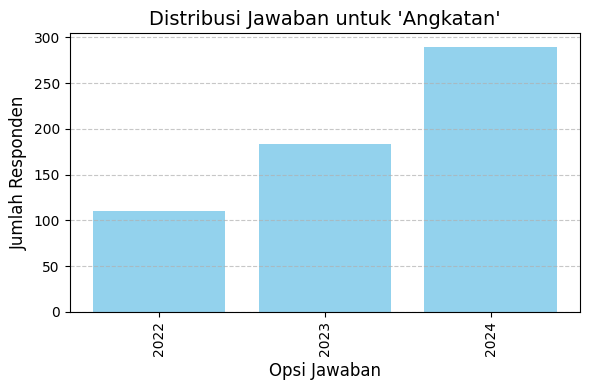

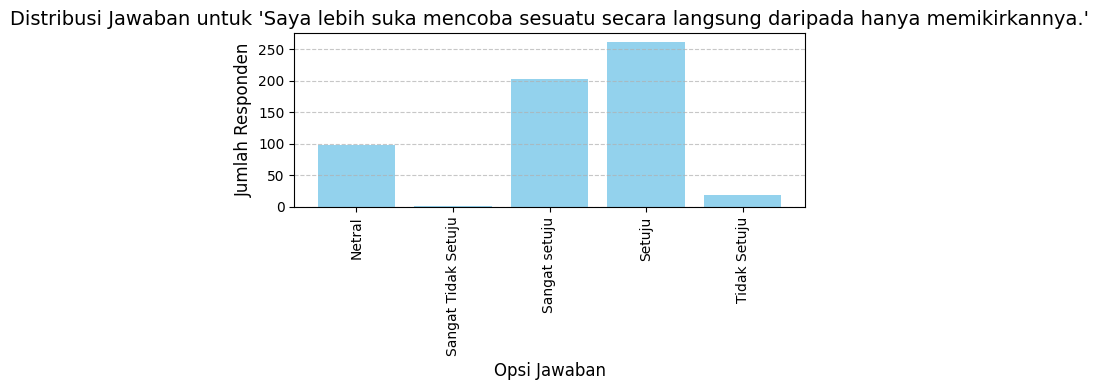

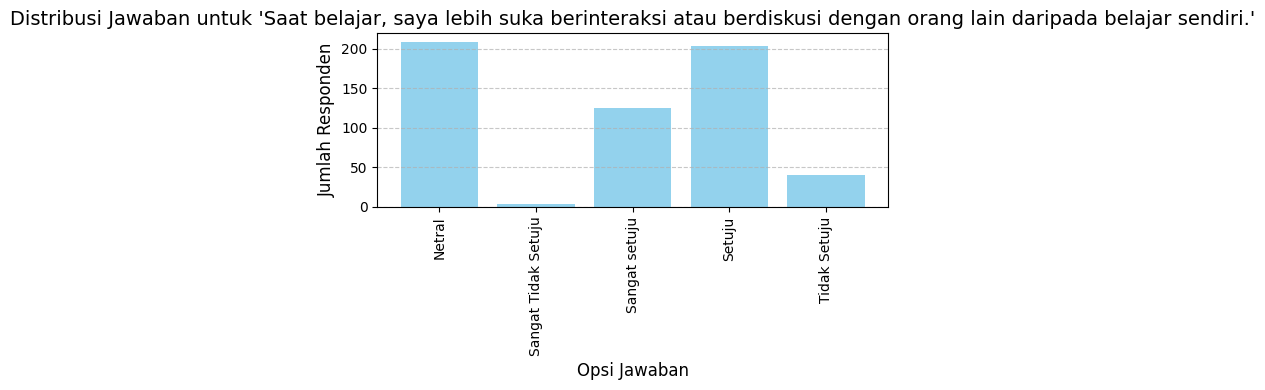

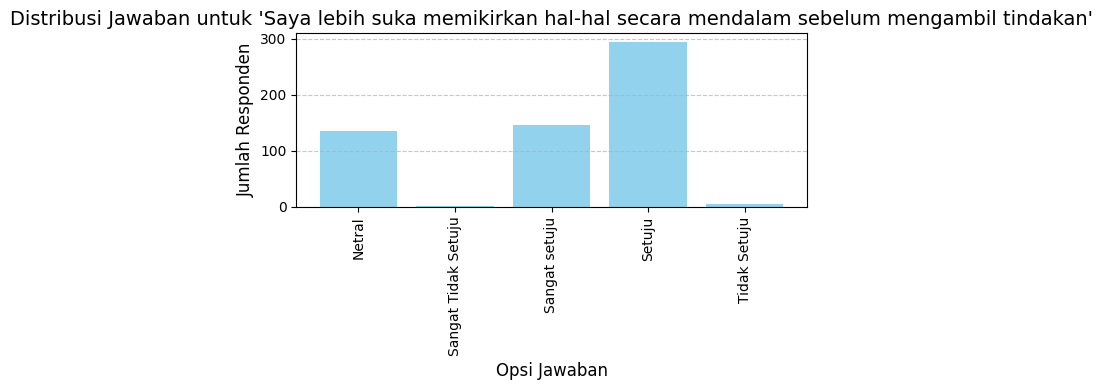

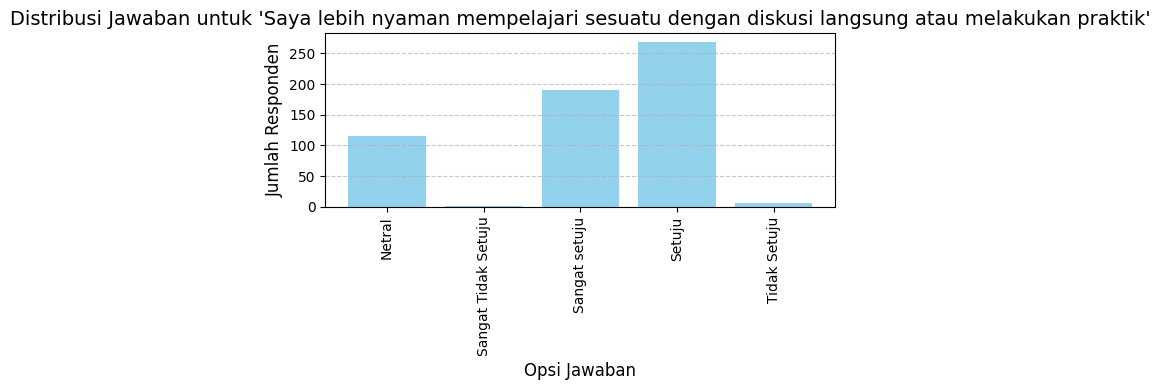

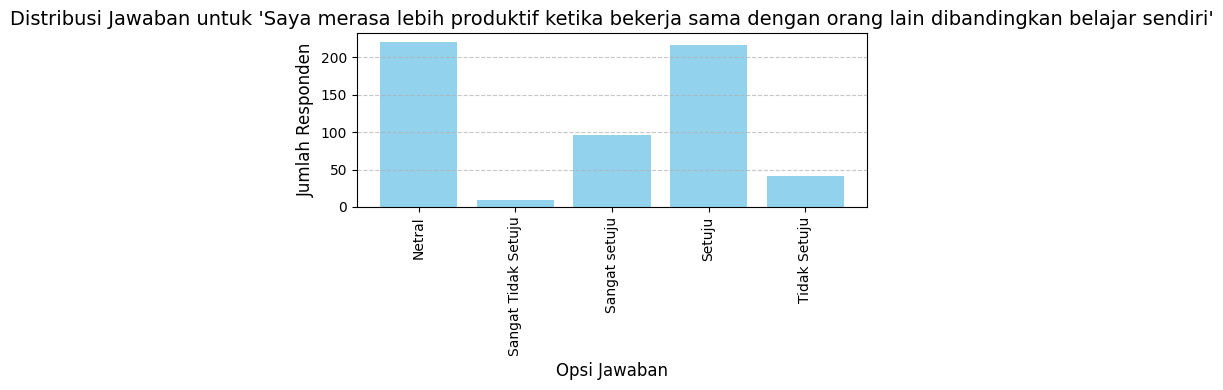

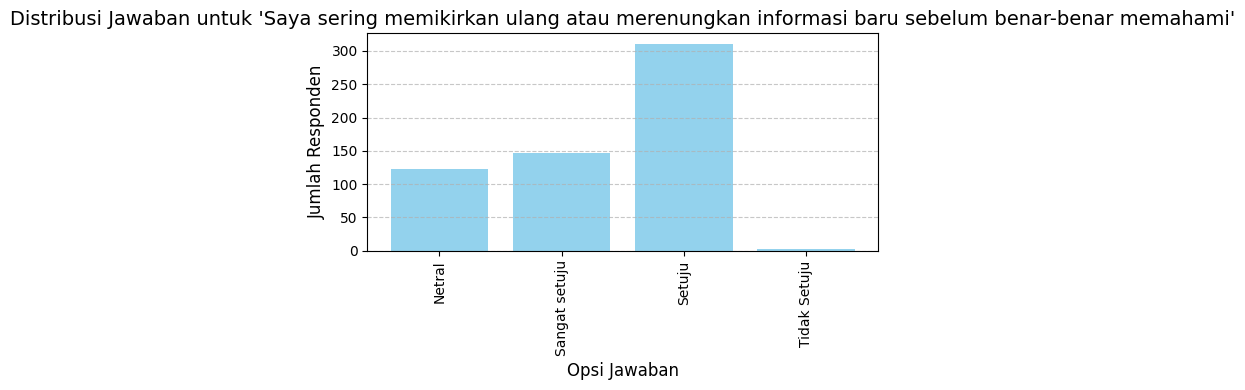

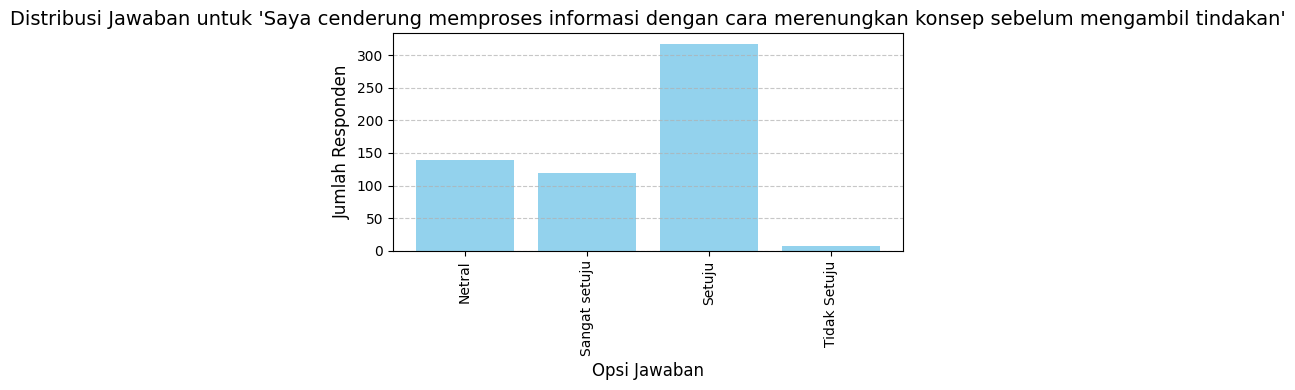

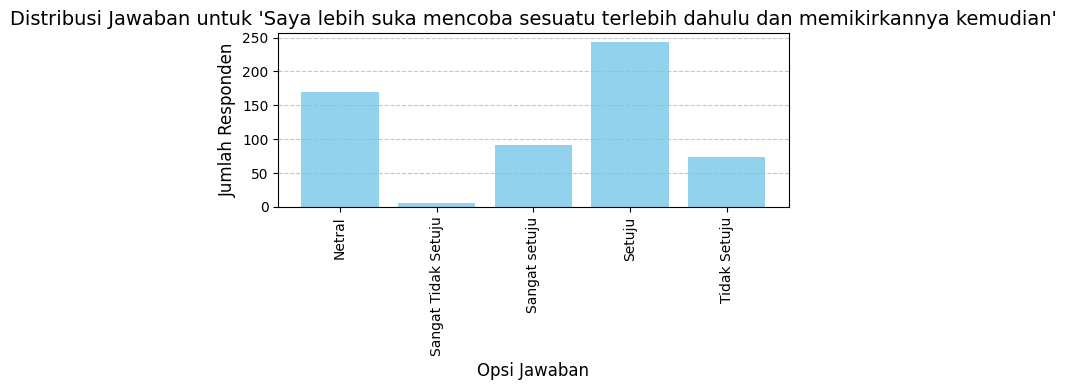

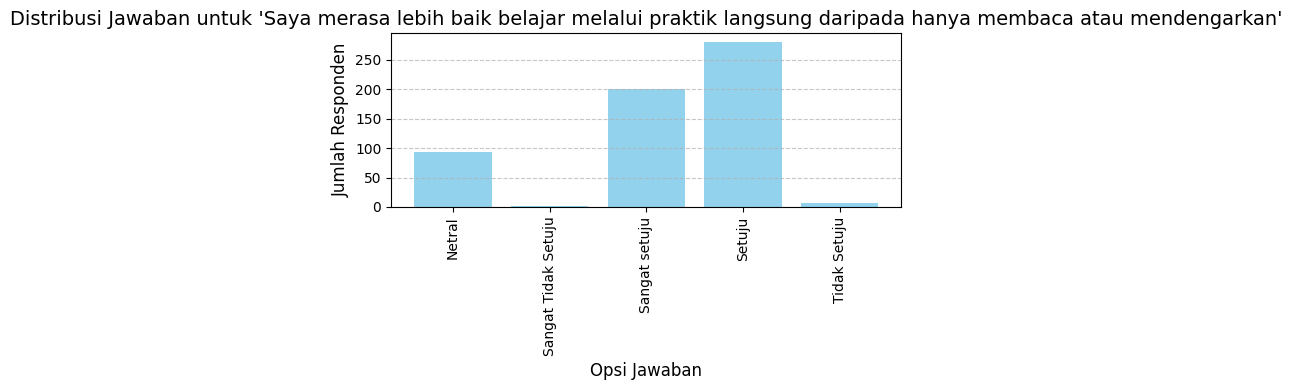

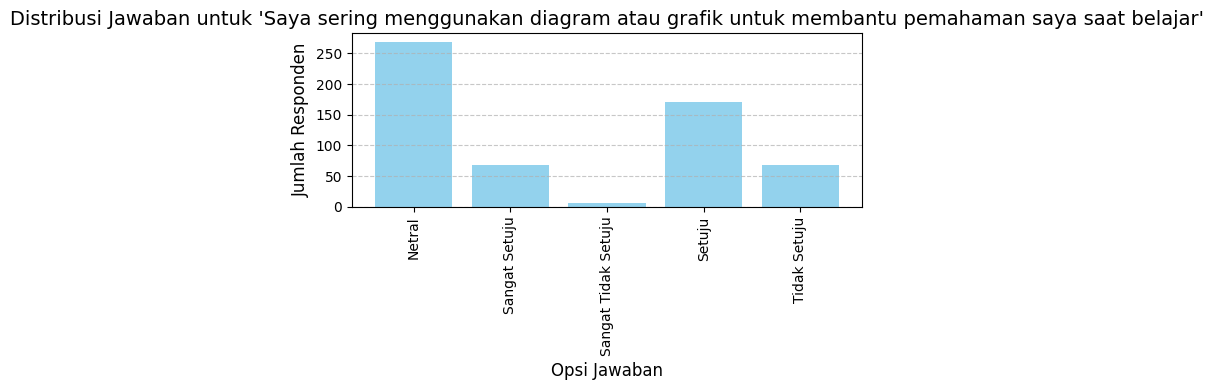

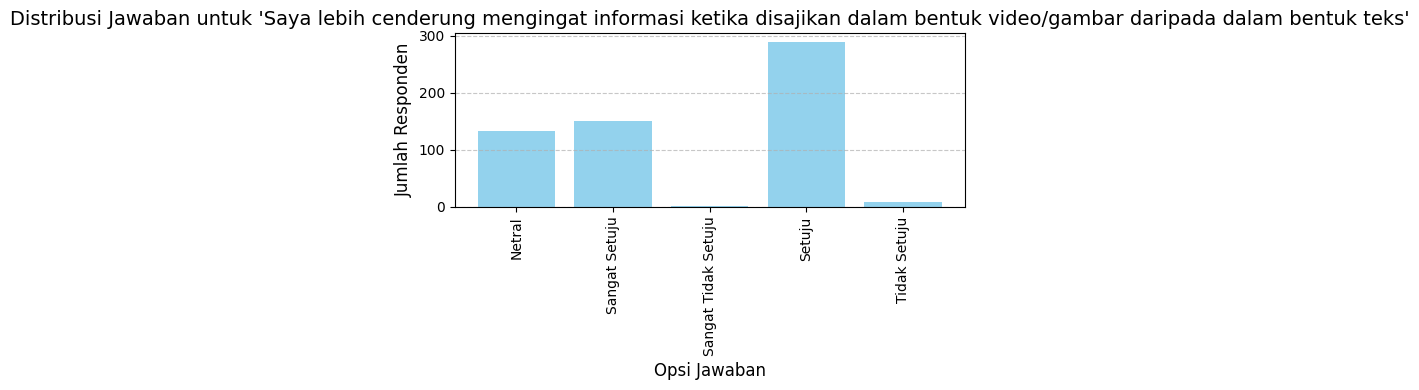

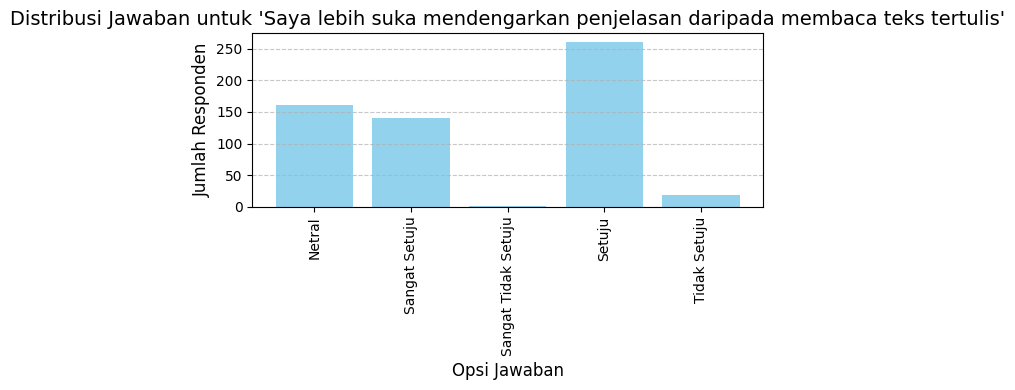

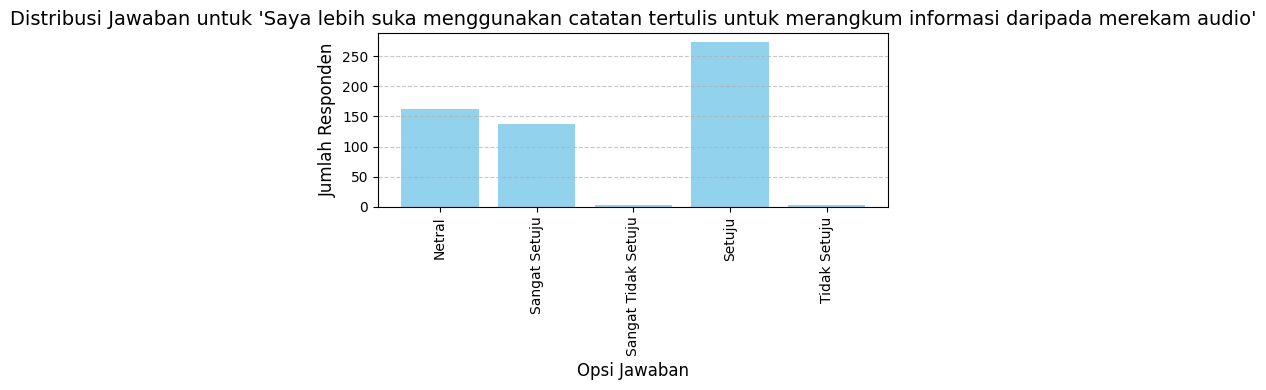

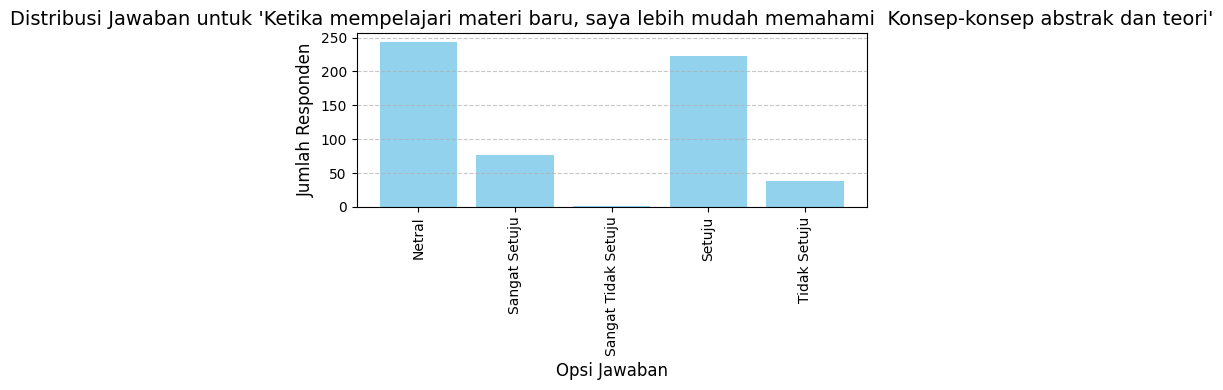

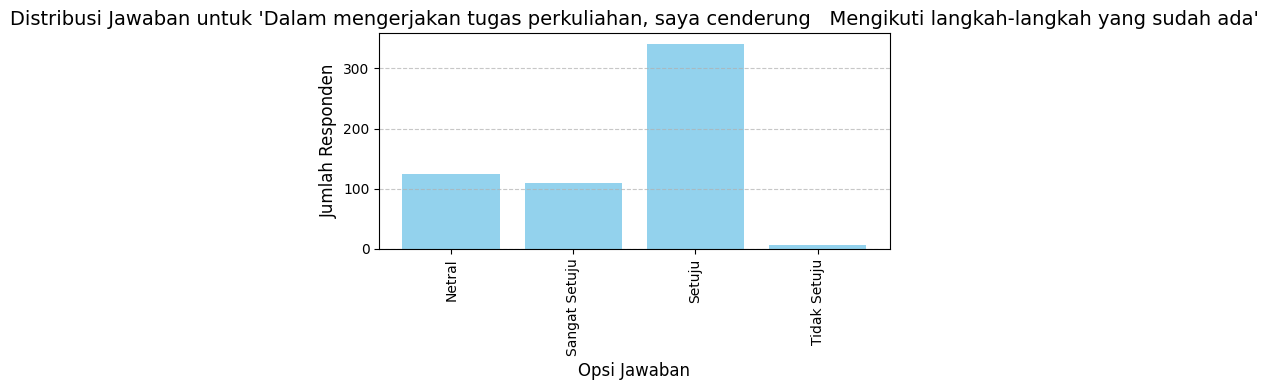

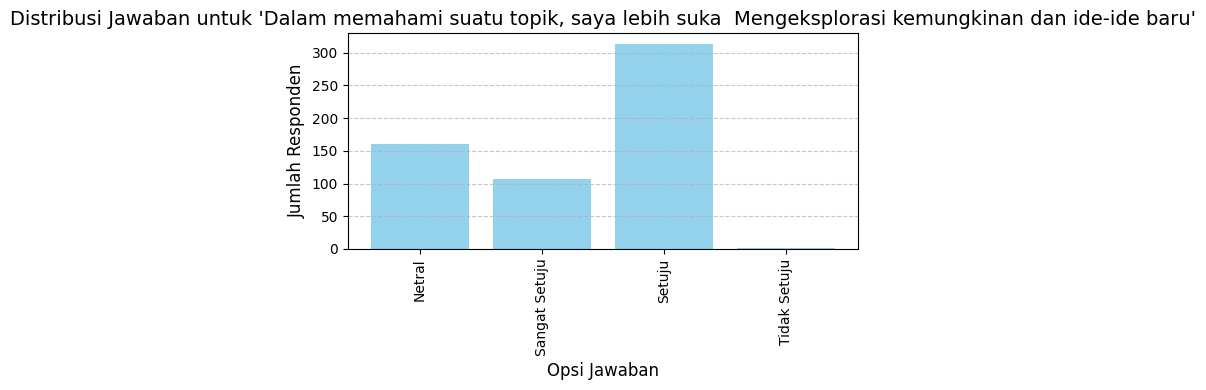

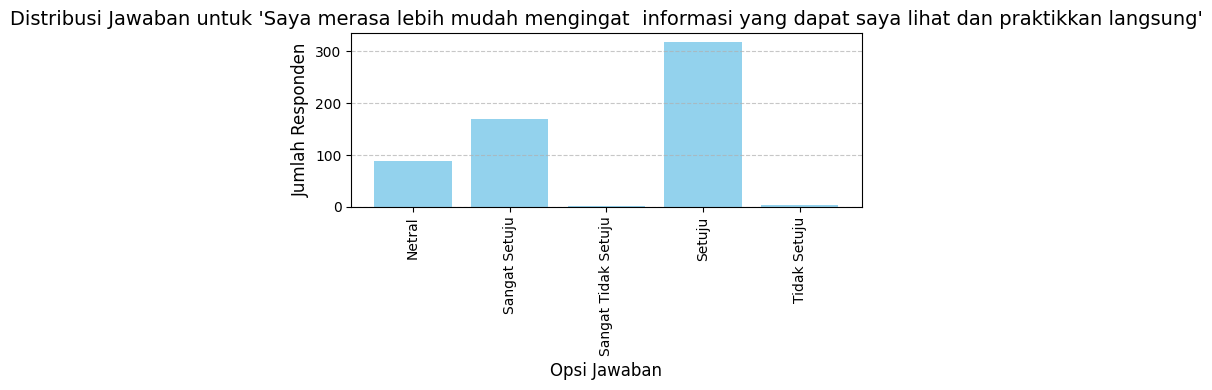

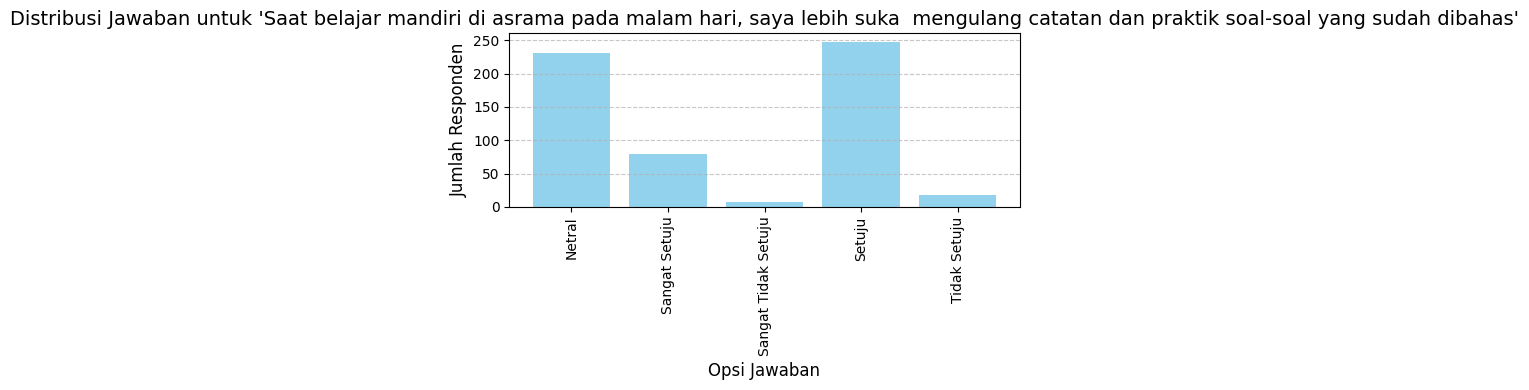

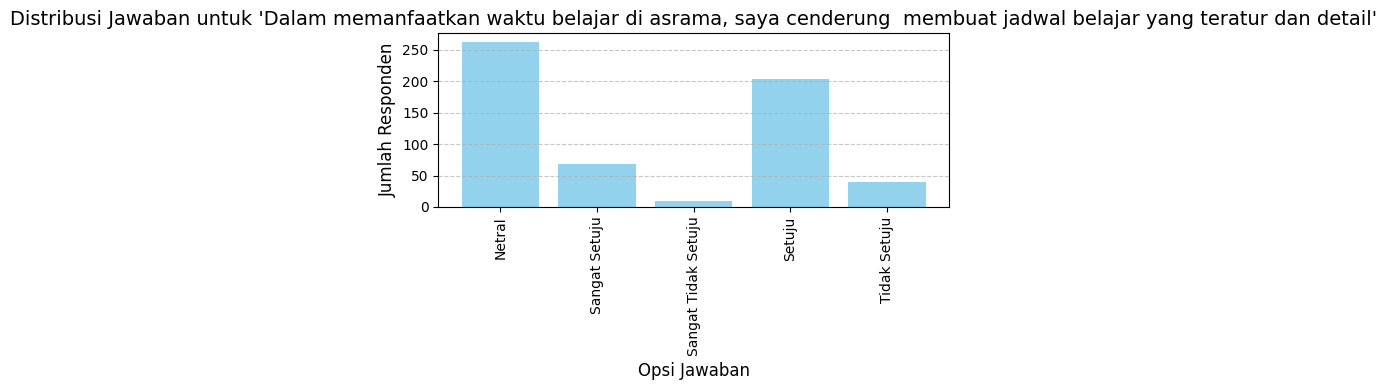

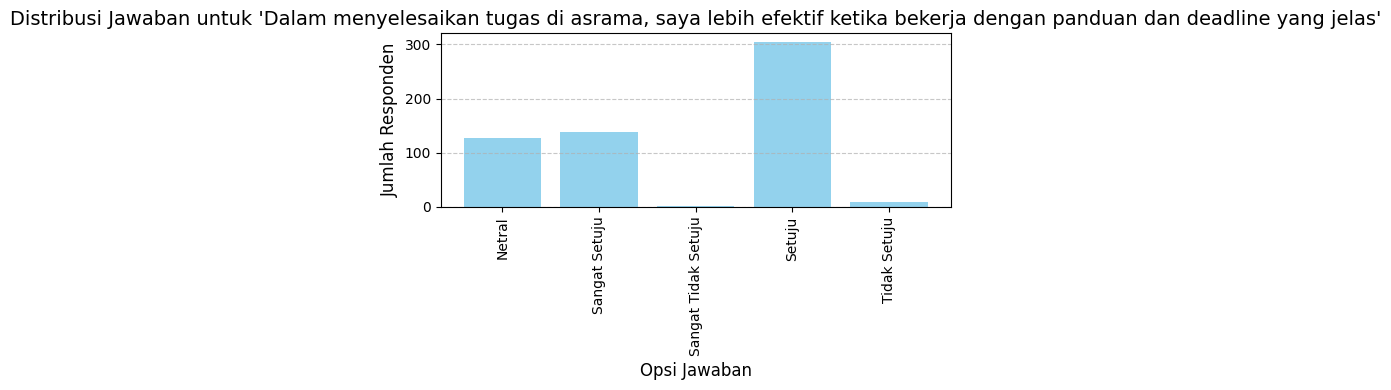

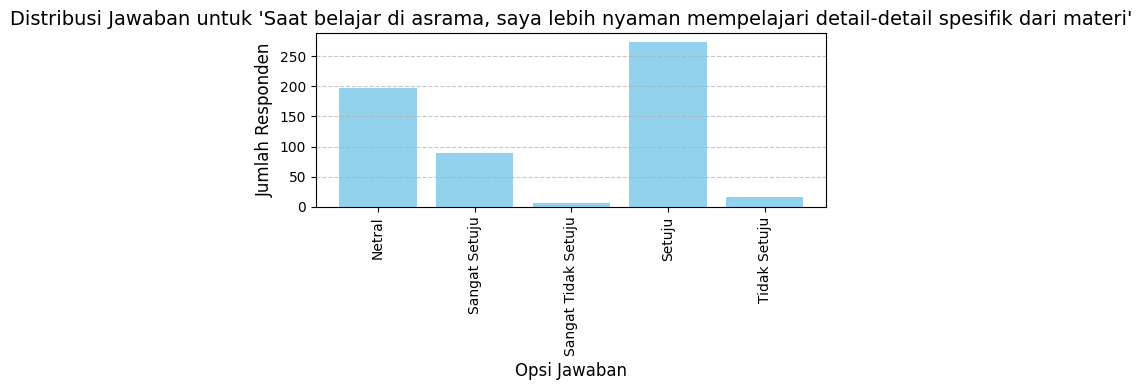

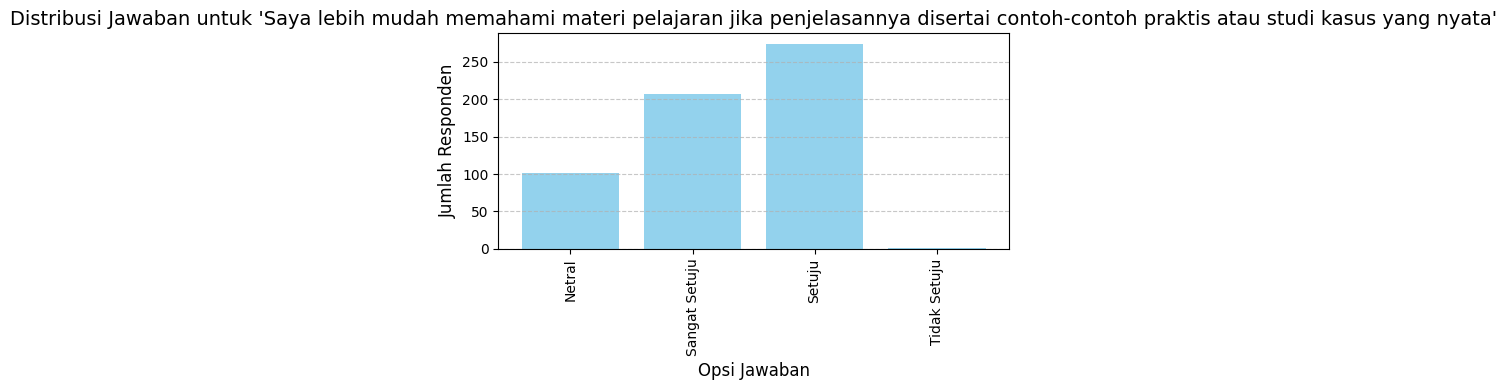

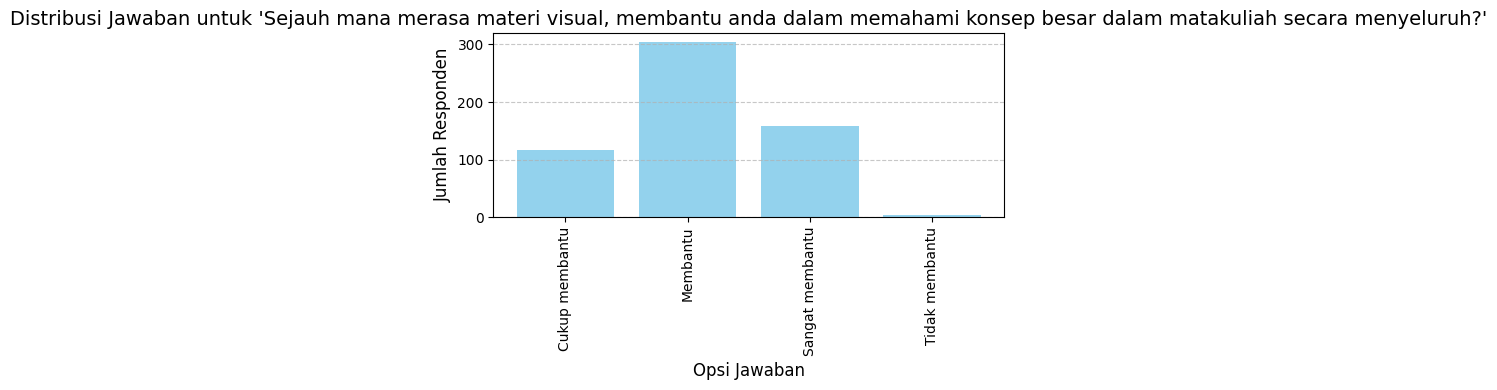

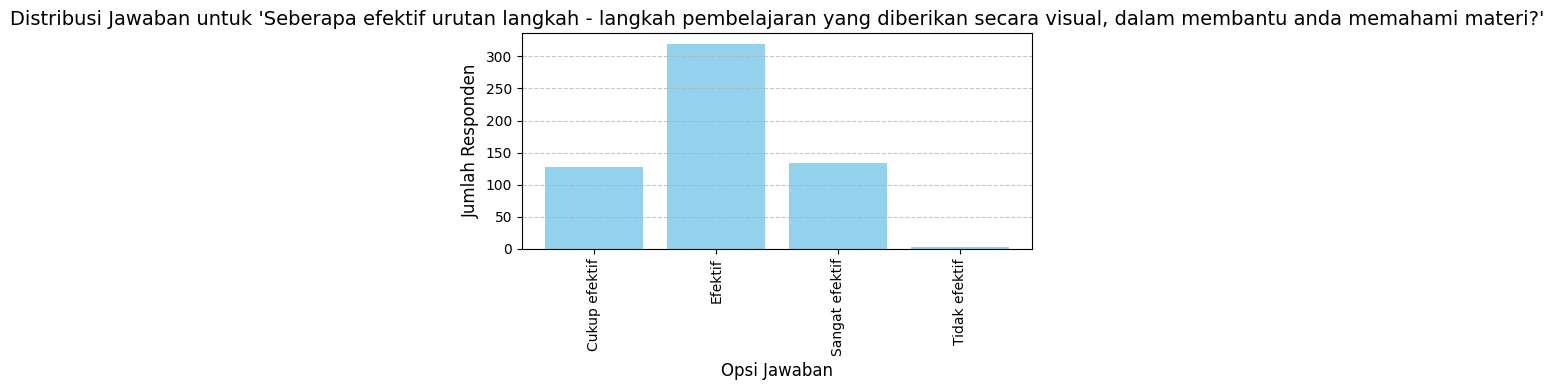

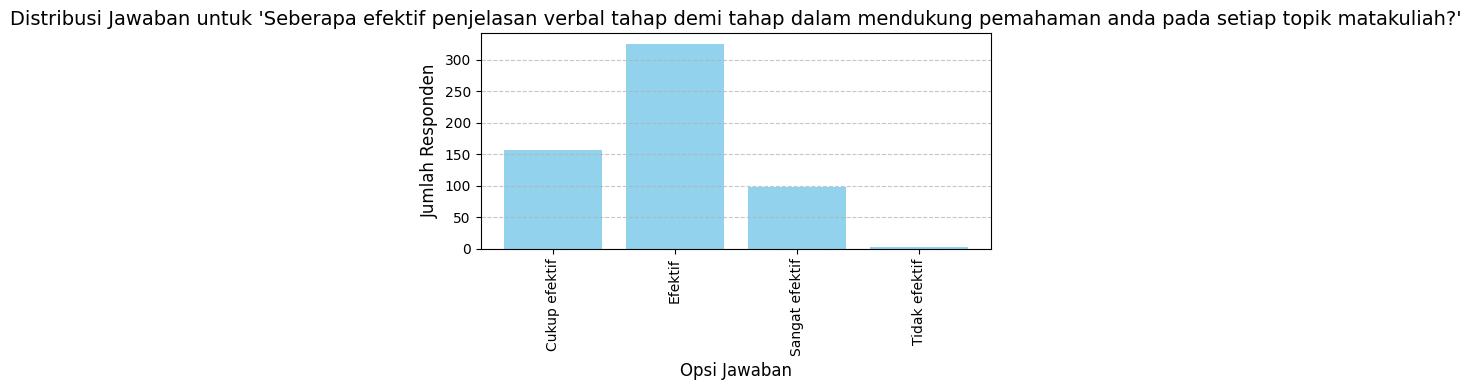

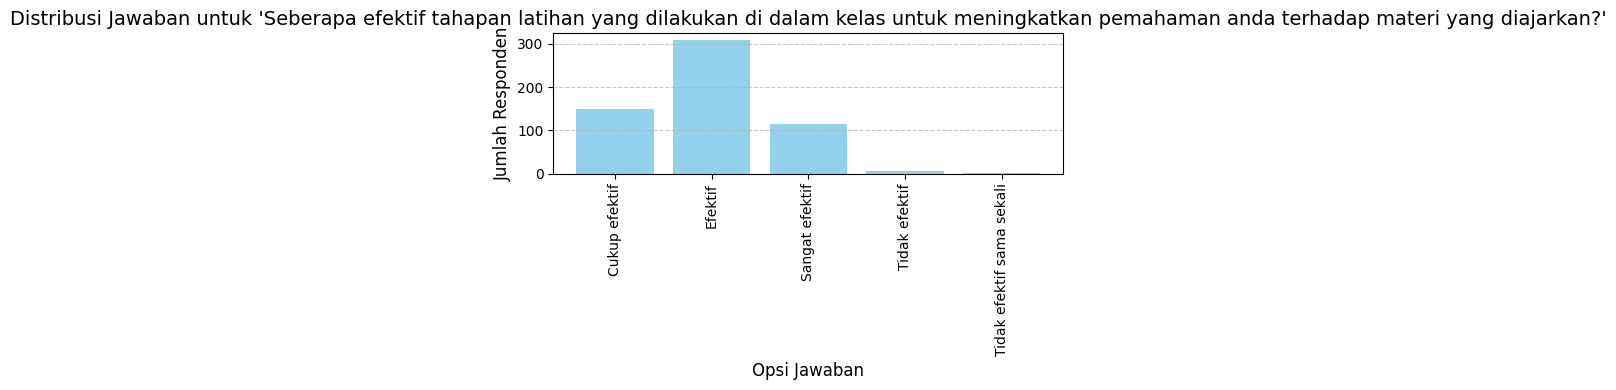

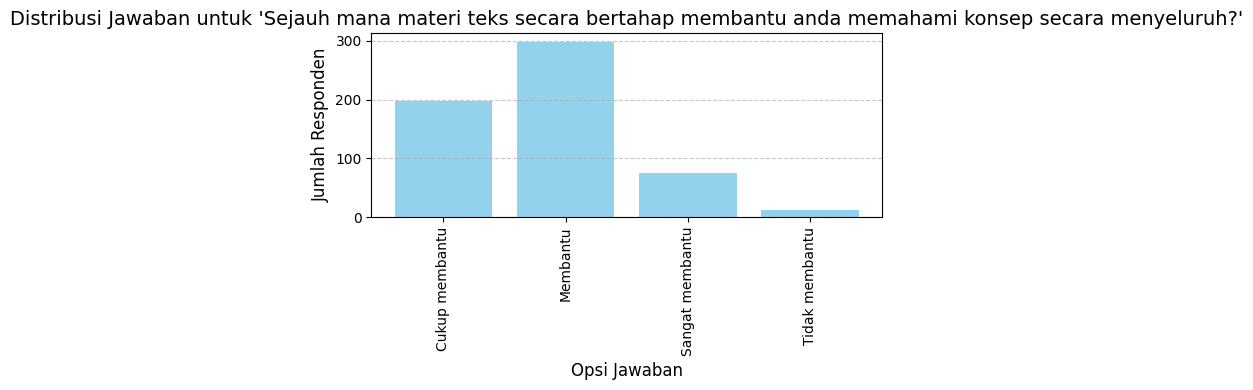

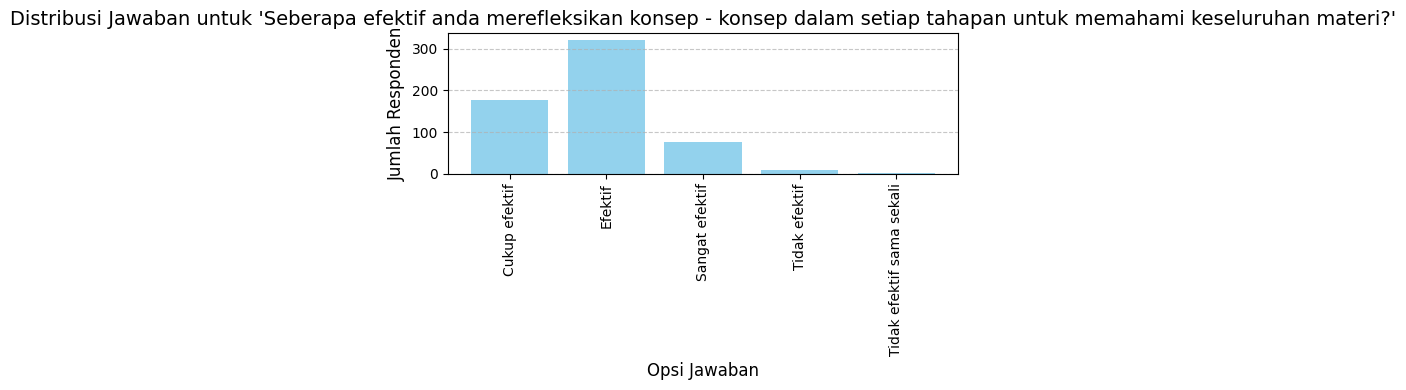

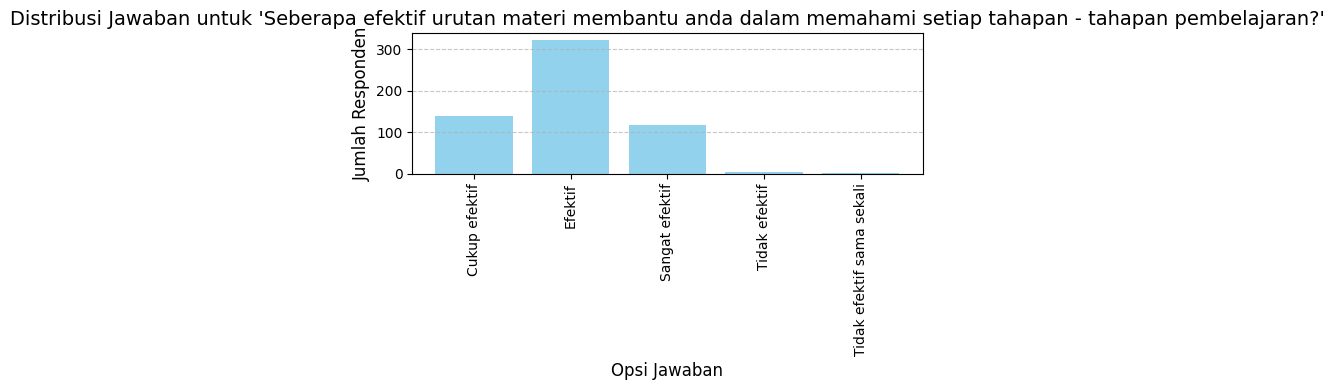

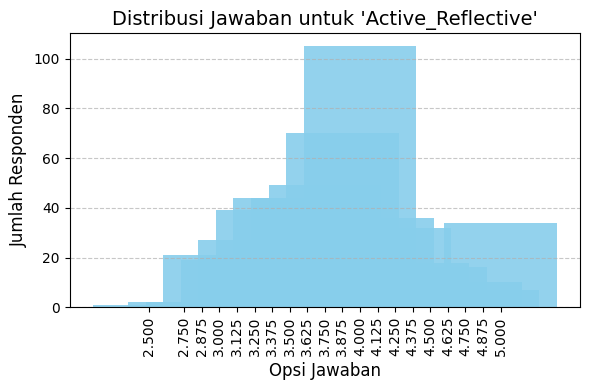

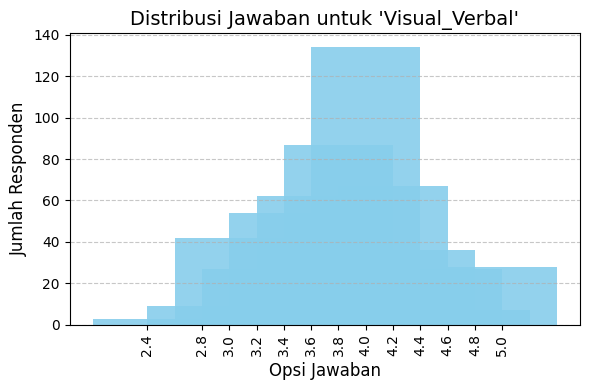

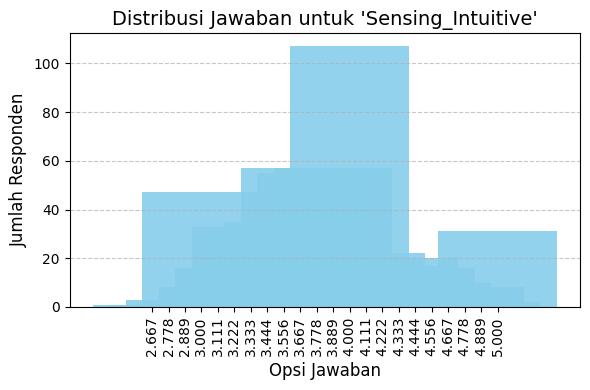

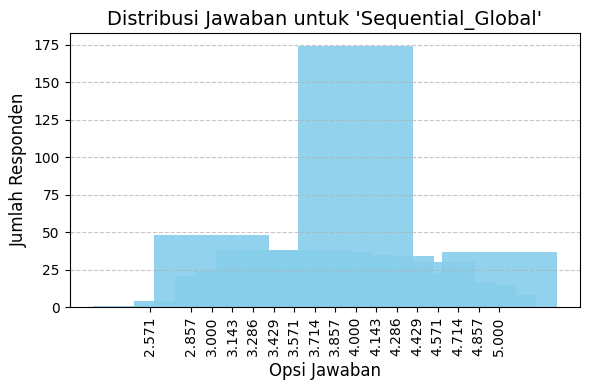

In [ ]:

# Buat confusion matrix untuk opini
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

question_columns = [col for col in df.columns]

# Loop melalui setiap kolom pertanyaan
for column in question_columns:
    distribution = df[column].value_counts().sort_index()

    # Plot bar chart untuk setiap pertanyaan
    plt.figure(figsize=(6, 4))
    plt.bar(distribution.index, distribution.values, color='skyblue', alpha=0.9)
    plt.title(f"Distribusi Jawaban untuk '{column}'", fontsize=14)
    plt.xlabel("Opsi Jawaban", fontsize=12)
    plt.ylabel("Jumlah Responden", fontsize=12)

    # Atur teks pada sumbu x agar vertikal
    plt.xticks(distribution.index, fontsize=10, rotation=90)

    # Tambahkan grid untuk memperjelas
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Untuk memastikan tidak ada elemen yang terpotong
    plt.show()

In [ ]:
  # Hitung skor rata-rata untuk setiap mahasiswa
df['Average_Score'] = df[['Active_Reflective', 'Visual_Verbal', 'Sensing_Intuitive', 'Sequential_Global']].mean(axis=1)

# Ambil Top 10 berdasarkan skor rata-rata
top_10_students = df.nlargest(10, 'Average_Score')
print(top_10_students)


     Angkatan  \
4        2024   
79       2023   
159      2024   
169      2024   
250      2022   
251      2024   
314      2023   
332      2023   
420      2024   
428      2024   

    Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.  \
4                                        Sangat setuju                              
79                                       Sangat setuju                              
159                                      Sangat setuju                              
169                                      Sangat setuju                              
250                                      Sangat setuju                              
251                                      Sangat setuju                              
314                                      Sangat setuju                              
332                                      Sangat setuju                              
420                                      Sangat

In [ ]:
# Tentukan batasan
thresholds = [0, 2.5, 3.5, 5]  # Batasan untuk kategori
labels = ['Low', 'Medium', 'High']  # Nama kategori

# Kategorikan rata-rata skor
df['Category'] = pd.cut(df['Average_Score'], bins=thresholds, labels=labels)
print(df[['Average_Score', 'Category']])


     Average_Score Category
0         3.398512   Medium
1         3.539583     High
2         4.000000     High
3         3.331845   Medium
4         5.000000     High
..             ...      ...
649       3.886508     High
650       3.850794     High
651       4.269444     High
652       3.751587     High
653       3.631944     High

[583 rows x 2 columns]


In [ ]:
# Mapping ulang semua kolom relevan berdasarkan gaya belajar
for col in active_reflective_columns:
    df[col] = df[col].map(lambda x: safe_map(x, mapping_agreement))

for col in visual_verbal_columns:
    df[col] = df[col].map(lambda x: safe_map(x, mapping_agreement))

for col in sensing_intuitive_columns:
    df[col] = df[col].map(lambda x: safe_map(x, mapping_agreement))

for col in sequential_global_columns:
    # Menyesuaikan kolom 'Sequential_Global' berdasarkan 'helpfulness' dan 'effectiveness'
    df[col] = df[col].map(
        lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.strip().lower()
        else safe_map(x, mapping_effectiveness)
    )

In [ ]:
# Buat pivot table dengan kategori pada kolom dan skor rata-rata pada baris
heatmap_data = df.pivot_table(index='Category', values='Average_Score', aggfunc='mean')

# Lihat hasil pivot
print(heatmap_data)


          Average_Score
Category               
Medium         3.284588
High           4.006849


<ipython-input-133-f541c8e0a4d1>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Category', values='Average_Score', aggfunc='mean')


In [ ]:
# Hitung jumlah entri per kategori
heatmap_data_count = df.pivot_table(index='Category', values='Average_Score', aggfunc='count')
print(heatmap_data_count)


          Average_Score
Category               
Low                   0
Medium              107
High                476


<ipython-input-134-c70e847b8e9c>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_count = df.pivot_table(index='Category', values='Average_Score', aggfunc='count')


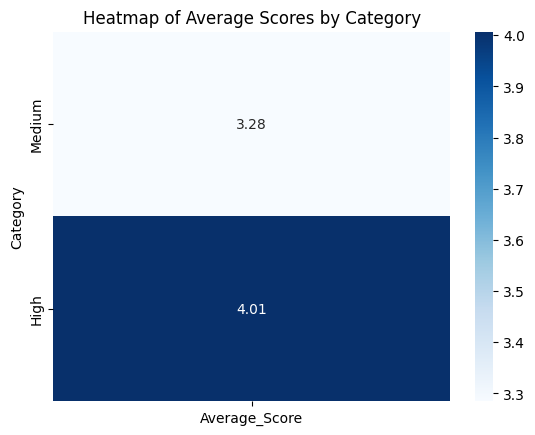

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Jika kamu ingin menggunakan rata-rata skor
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f')

# Jika kamu ingin melihat jumlah entri per kategori
# sns.heatmap(heatmap_data_count, annot=True, cmap='Blues', fmt='d')

plt.title("Heatmap of Average Scores by Category")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Filter pertanyaan yang memenuhi threshold untuk setiap gaya belajar
def filter_significant_questions_all_styles(results, categories, threshold):
    significant_questions = {}
    for category, averages in categories.items():
        filtered = {}
        for question, distribution in averages.items():
            avg_score = sum(score * freq for score, freq in distribution.items())
            if avg_score > threshold:  # Filter pertanyaan dengan skor di atas threshold
                filtered[question] = avg_score
        significant_questions[category] = filtered
    return significant_questions

In [ ]:
# Daftar kategori gaya belajar
categories = {
    'Active_Reflective': results['Active_Reflective_Question_Averages'],
    'Visual_Verbal': results['Visual_Verbal_Question_Averages'],
    'Sensing_Intuitive': results['Sensing_Intuitive_Question_Averages'],
    'Sequential_Global': results['Sequential_Global_Question_Averages'],
}

# Terapkan threshold
threshold = 3  # Threshold dapat disesuaikan
significant_questions = filter_significant_questions_all_styles(results, categories, threshold)


<ipython-input-138-dc339c7caf06>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


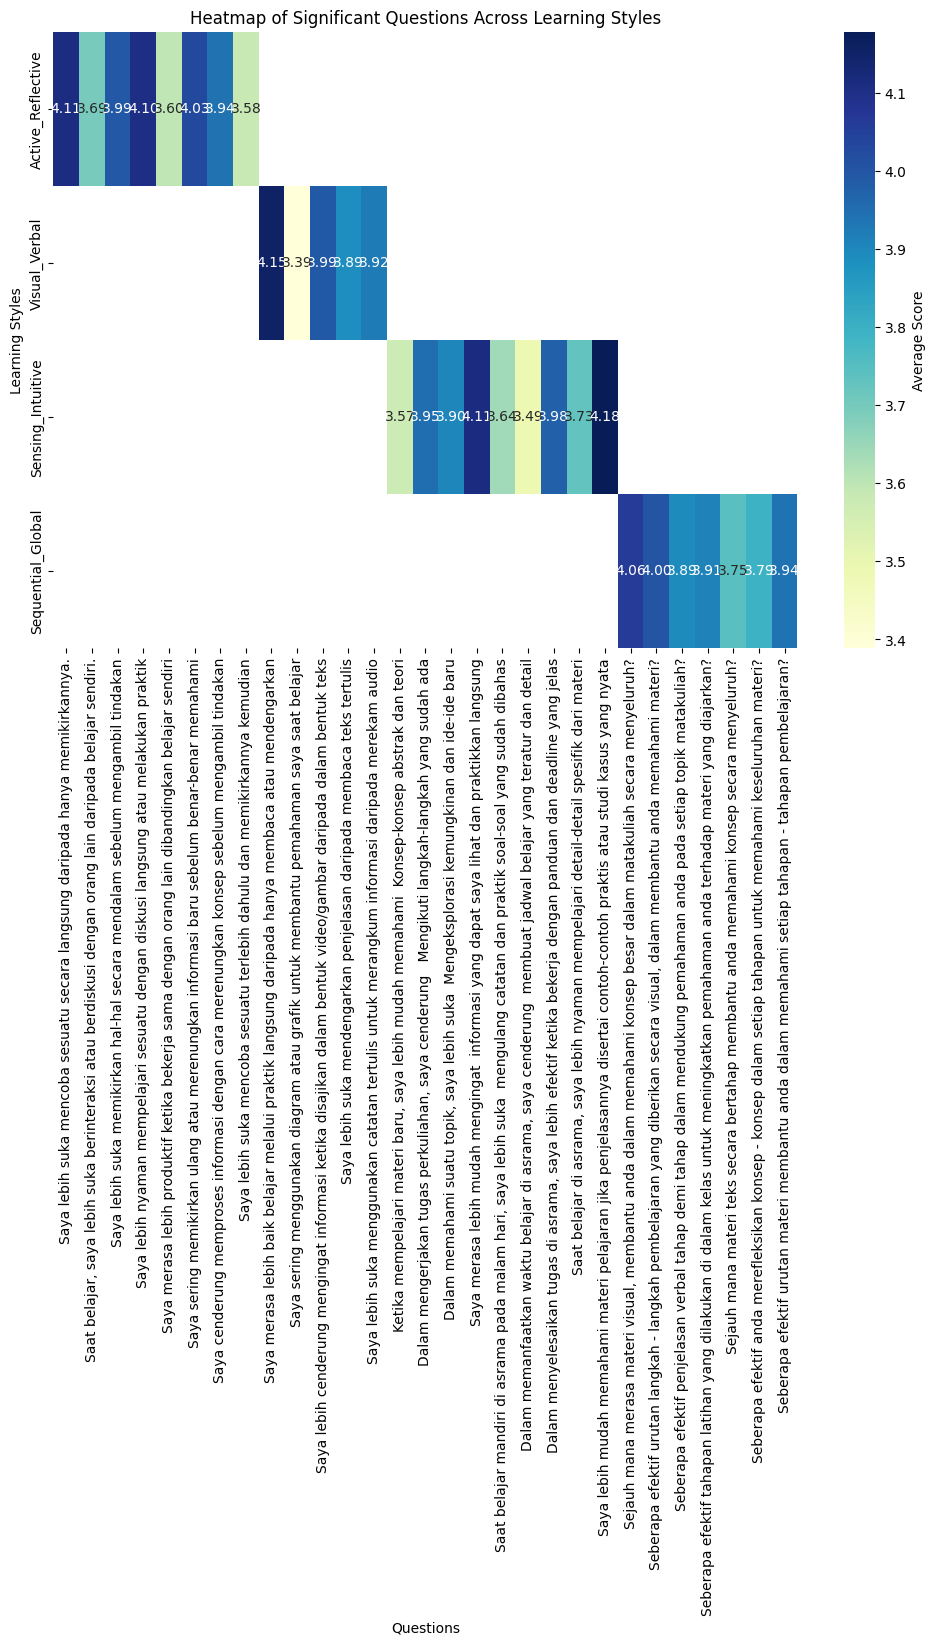

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Visualisasi dengan heatmap
def prepare_heatmap_data(significant_questions):
    heatmap_data = pd.DataFrame()
    for style, questions in significant_questions.items():
        for question, avg_score in questions.items():
            heatmap_data.loc[style, question] = avg_score
    return heatmap_data

heatmap_data = prepare_heatmap_data(significant_questions)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average Score'})
plt.title("Heatmap of Significant Questions Across Learning Styles")
plt.xlabel("Questions")
plt.ylabel("Learning Styles")
plt.tight_layout()
plt.show()

In [ ]:
# Gabungkan semua pertanyaan signifikan ke dalam selected_columns
selected_columns = []
for category, questions in significant_questions.items():
    selected_columns.extend(list(questions.keys()))

# Pastikan tidak ada duplikasi
selected_columns = list(set(selected_columns))

# Sekarang kita sudah punya selected_columns yang berisi nama-nama kolom pertanyaan signifikan

# Dataframe berisi skor pertanyaan yang relevan
question_data = df[selected_columns]  # Hanya kolom pertanyaan signifikan

# Normalisasi skor menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(question_data)

# Mengonversi hasil normalisasi ke dalam DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=selected_columns)

# Menampilkan hasil normalisasi
print(normalized_df.head())

   Seberapa efektif urutan langkah - langkah pembelajaran yang diberikan secara visual, dalam membantu anda memahami materi?  \
0                                           0.333333                                                                           
1                                           0.666667                                                                           
2                                           0.666667                                                                           
3                                           0.666667                                                                           
4                                           1.000000                                                                           

   Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan  \
0                                               0.75                               
1                                               0.75           

<ipython-input-140-08d0fe0325bf>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


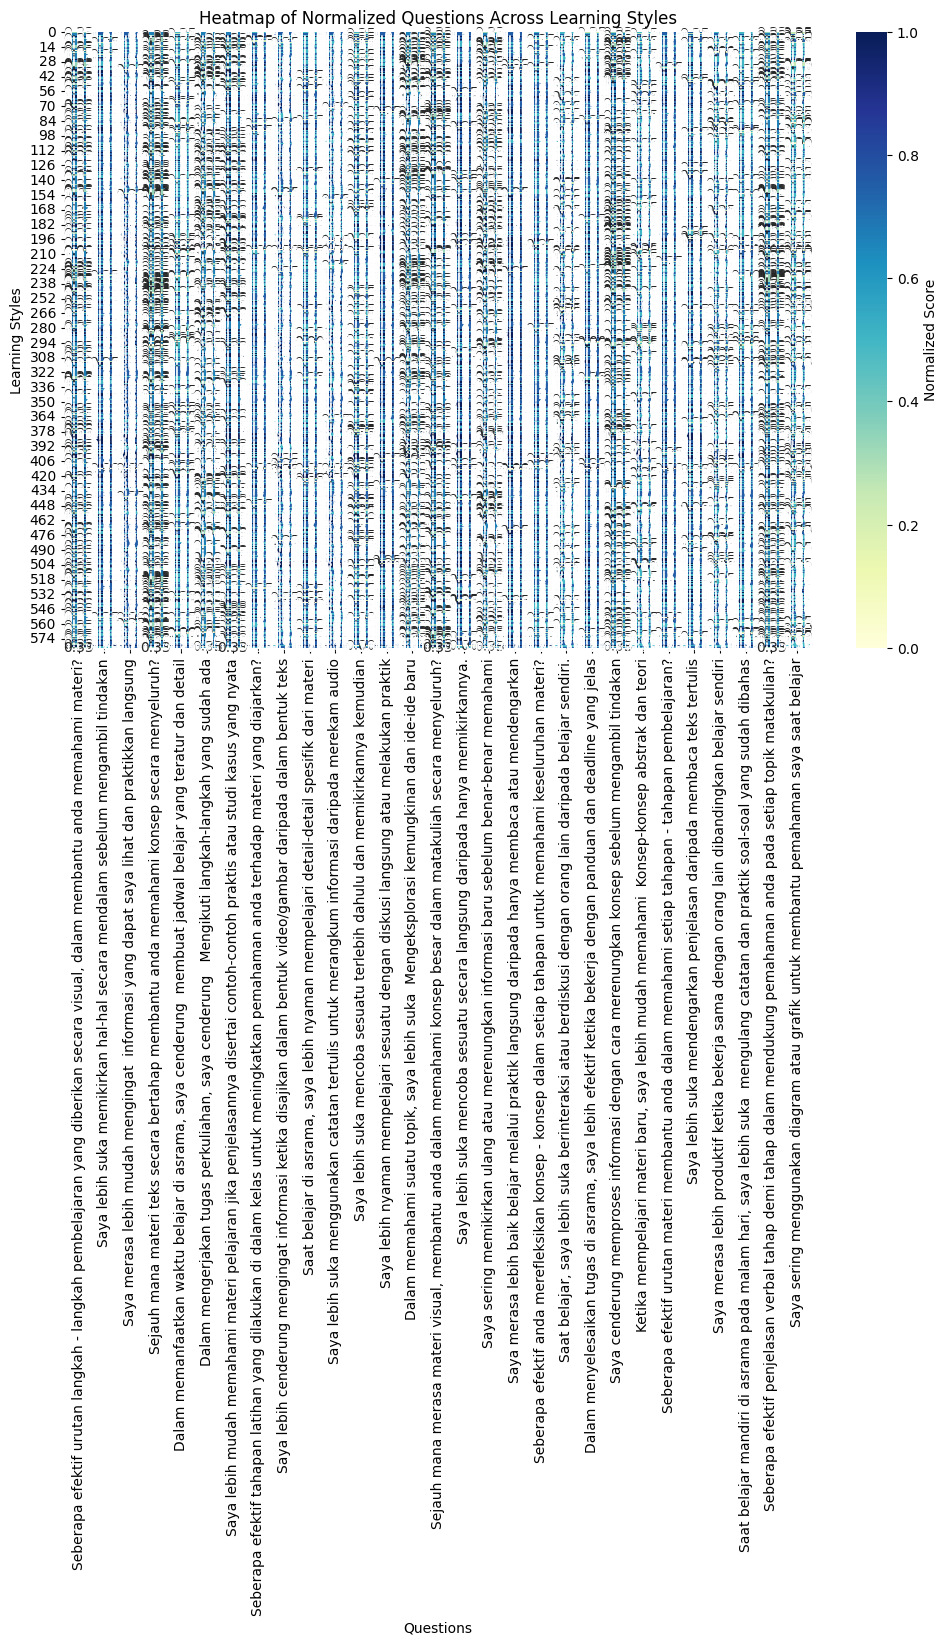

In [ ]:
# Visualisasi dengan heatmap
def prepare_heatmap_data(normalized_df):
    heatmap_data = normalized_df.copy()
    return heatmap_data

# Siapkan data untuk heatmap dari DataFrame yang telah dinormalisasi
heatmap_data = prepare_heatmap_data(normalized_df)

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Normalized Score'})
plt.title("Heatmap of Normalized Questions Across Learning Styles")
plt.xlabel("Questions")
plt.ylabel("Learning Styles")
plt.tight_layout()
plt.show()

In [ ]:
# Definisikan category_columns berdasarkan significant_questions
category_columns = {
    'Active_Reflective': list(significant_questions['Active_Reflective'].keys()),
    'Visual_Verbal': list(significant_questions['Visual_Verbal'].keys()),
    'Sensing_Intuitive': list(significant_questions['Sensing_Intuitive'].keys()),
    'Sequential_Global': list(significant_questions['Sequential_Global'].keys()),
}

# Menghitung rata-rata dan standar deviasi untuk setiap kategori
for category, columns in category_columns.items():
    df[f"{category}_mean"] = df[columns].mean(axis=1)
    df[f"{category}_std"] = df[columns].std(axis=1)
    df[f"{category}_high_score_pct"] = (df[columns] >= 4).mean(axis=1)


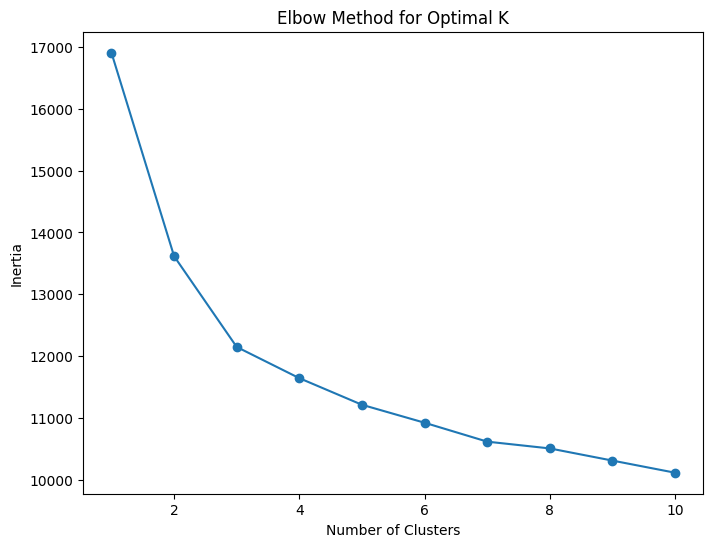

In [ ]:
# Normalisasi data untuk clustering (gunakan normalized_df)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_df)

# Menentukan jumlah cluster yang optimal dengan Elbow Method
inertia = []
for k in range(1, 11):  # Coba jumlah cluster dari 1 sampai 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [ ]:
# # Berdasarkan grafik Elbow, tentukan jumlah cluster (misalnya 3)
# kmeans = KMeans(n_clusters=4, random_state=42)
# df['Question_Cluster'] = kmeans.fit_predict(scaled_data)

# # Evaluasi clustering dengan Silhouette Score
# silhouette_avg = silhouette_score(scaled_data, df['Question_Cluster'])
# print(f"Silhouette Score: {silhouette_avg:.2f}")

In [ ]:
# Melakukan smoothing data menggunakan moving average
window_size = 3  # Ukuran jendela, bisa disesuaikan untuk lebih halus atau lebih tajam
smoothed_data = normalized_df.rolling(window=window_size).mean()

# Menampilkan hasil smoothing
print(smoothed_data.head())


   Seberapa efektif urutan langkah - langkah pembelajaran yang diberikan secara visual, dalam membantu anda memahami materi?  \
0                                                NaN                                                                           
1                                                NaN                                                                           
2                                           0.555556                                                                           
3                                           0.666667                                                                           
4                                           0.777778                                                                           

   Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan  \
0                                                NaN                               
1                                                NaN           

In [ ]:
# Mengisi nilai NaN dengan nilai sebelumnya (Forward Fill)
smoothed_data_filled = smoothed_data.fillna(method='ffill')

# Atau mengisi nilai NaN dengan nilai setelahnya (Backward Fill)
smoothed_data_filled = smoothed_data.fillna(method='bfill')

# Tampilkan hasil
print(smoothed_data_filled.head())


   Seberapa efektif urutan langkah - langkah pembelajaran yang diberikan secara visual, dalam membantu anda memahami materi?  \
0                                           0.555556                                                                           
1                                           0.555556                                                                           
2                                           0.555556                                                                           
3                                           0.666667                                                                           
4                                           0.777778                                                                           

   Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan  \
0                                           0.750000                               
1                                           0.750000           

<ipython-input-145-d6561cee8368>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_data_filled = smoothed_data.fillna(method='ffill')
<ipython-input-145-d6561cee8368>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_data_filled = smoothed_data.fillna(method='bfill')


<ipython-input-146-d7994bc29271>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


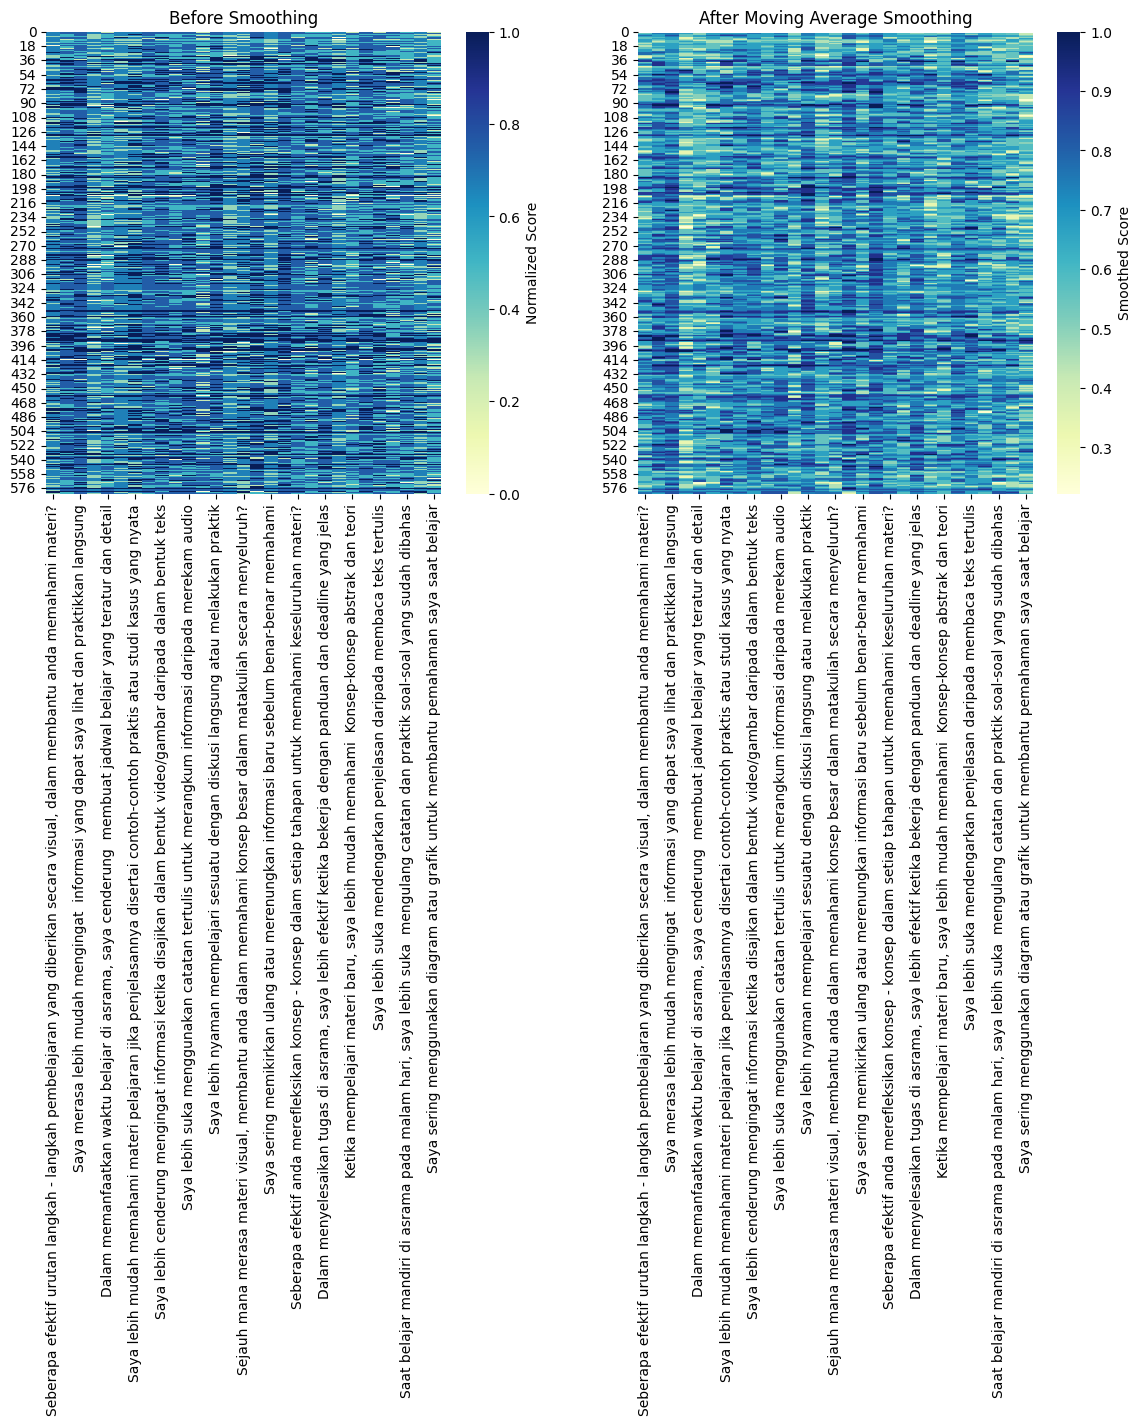

In [ ]:
# Plot sebelum dan sesudah smoothing
plt.figure(figsize=(14, 6))

# Plot Data Sebelum Smoothing
plt.subplot(1, 2, 1)
sns.heatmap(normalized_df, annot=False, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Normalized Score'})
plt.title("Before Smoothing")

# Plot Data Setelah Moving Average Smoothing
plt.subplot(1, 2, 2)
sns.heatmap(smoothed_data, annot=False, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Smoothed Score'})
plt.title("After Moving Average Smoothing")

plt.tight_layout()
plt.show()


In [ ]:
# Menggunakan KMeans setelah smoothing (Moving Average)
kmeans = KMeans(n_clusters=3, random_state=42)
smoothed_scaled_data = StandardScaler().fit_transform(smoothed_data)

# Melakukan clustering dengan data yang telah dismooth
smoothed_kmeans = kmeans.fit_predict(smoothed_data_filled)

# Menambahkan hasil clustering ke DataFrame
df['Smoothed_Cluster'] = smoothed_kmeans

# Evaluasi clustering dengan Silhouette Score
silhouette_avg_smoothed = silhouette_score(smoothed_data_filled, smoothed_kmeans)
print(f"Silhouette Score setelah smoothing: {silhouette_avg_smoothed:.2f}")


Silhouette Score setelah smoothing: 0.13


Distribusi cluster:
Smoothed_Cluster
0    275
2    198
1    110
Name: count, dtype: int64


<ipython-input-148-80495b16d390>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette="viridis")


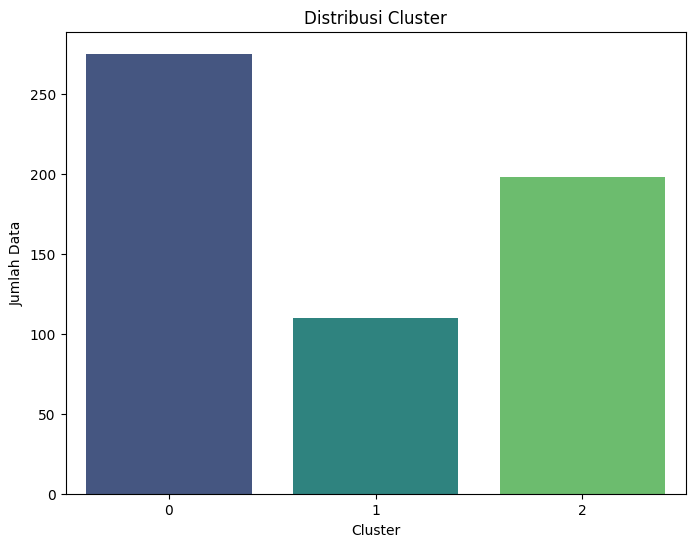

In [ ]:
# Cek distribusi cluster
cluster_distribution = df['Smoothed_Cluster'].value_counts()
print("Distribusi cluster:")
print(cluster_distribution)

# Visualisasi distribusi cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette="viridis")
plt.title("Distribusi Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()


In [ ]:
# Statistik deskriptif berdasarkan cluster
cluster_stats = df['Smoothed_Cluster'].mean()
print("Statistik rata-rata tiap cluster:")
print(cluster_stats)


Statistik rata-rata tiap cluster:
0.8679245283018868


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Definisikan data fitur (X) dan target (y)
X = df.drop(['Smoothed_Cluster'], axis=1)  # Ganti 'Smoothed_Cluster' dengan nama kolom target Anda
y = df['Smoothed_Cluster']  # Target: Kolom target hasil clustering

# Tentukan kolom kategori yang perlu di-encode
categorical_features = ['Category']  # Ganti dengan nama kolom kategori yang sesuai
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough'  # Kolom lain tetap tanpa perubahan
)

# Terapkan OneHotEncoder pada fitur
X_encoded = preprocessor.fit_transform(X)

# Setelah encoding, lakukan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Gabungkan kembali fitur dan target menjadi DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=preprocessor.get_feature_names_out())
balanced_df['Smoothed_Cluster'] = y_resampled

# Menampilkan distribusi setelah oversampling
print("Distribusi setelah oversampling dengan SMOTE:")
print(balanced_df['Smoothed_Cluster'].value_counts())


Distribusi setelah oversampling dengan SMOTE:
Smoothed_Cluster
2    275
1    275
0    275
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Ukuran dataset asli: 583
Ukuran dataset setelah undersampling: 825


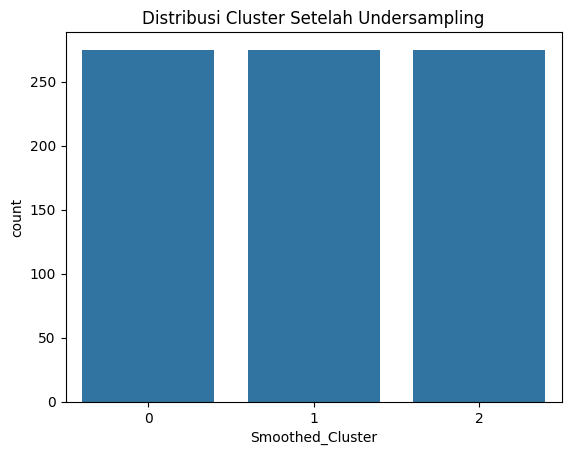

In [ ]:
# Memeriksa ukuran dataset
print(f"Ukuran dataset asli: {len(df)}")
print(f"Ukuran dataset setelah undersampling: {len(balanced_df)}")

# Visualisasi distribusi cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Smoothed_Cluster', data=balanced_df)
plt.title('Distribusi Cluster Setelah Undersampling')
plt.show()

In [ ]:
silhouette_avg_smoothed = silhouette_score(smoothed_data_filled, smoothed_kmeans)
print(f"Silhouette Score setelah smoothing: {silhouette_avg_smoothed:.2f}")

Silhouette Score setelah smoothing: 0.13


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Split balanced data into features (X) and target (y)
X = balanced_df.drop(columns=['Smoothed_Cluster'])  # Semua kolom kecuali target
y = balanced_df['Smoothed_Cluster']  # Target kolom

# Train-Test-Validation Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Parameter Tuning - Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
# Parameter Tuning - SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=svm_param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



# Classification Reports
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.65      0.53      0.59        32
           1       0.71      0.77      0.74        26
           2       0.62      0.72      0.67        25

    accuracy                           0.66        83
   macro avg       0.66      0.67      0.66        83
weighted avg       0.66      0.66      0.66        83

SVM Classification Report
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        32
           1       0.68      0.81      0.74        26
           2       0.69      0.80      0.74        25

    accuracy                           0.66        83
   macro avg       0.66      0.68      0.66        83
weighted avg       0.65      0.66      0.65        83



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix untuk Random Forest
print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix untuk SVM
print("Confusion Matrix - SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix - Random Forest:
[[17  7  8]
 [ 3 20  3]
 [ 6  1 18]]
Confusion Matrix - SVM:
[[14  9  9]
 [ 5 21  0]
 [ 4  1 20]]


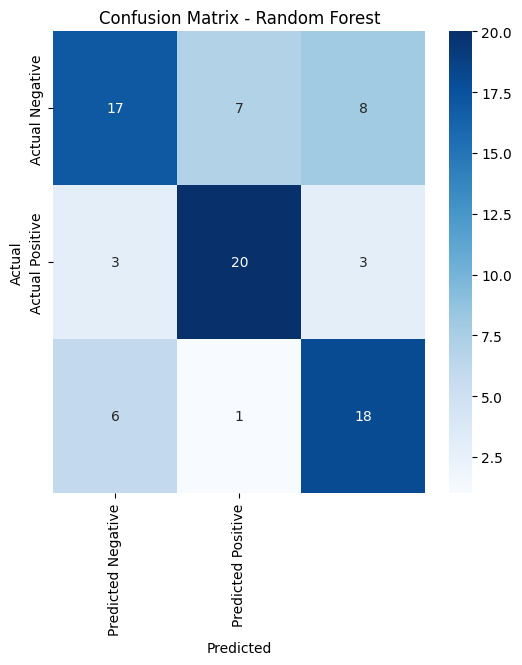

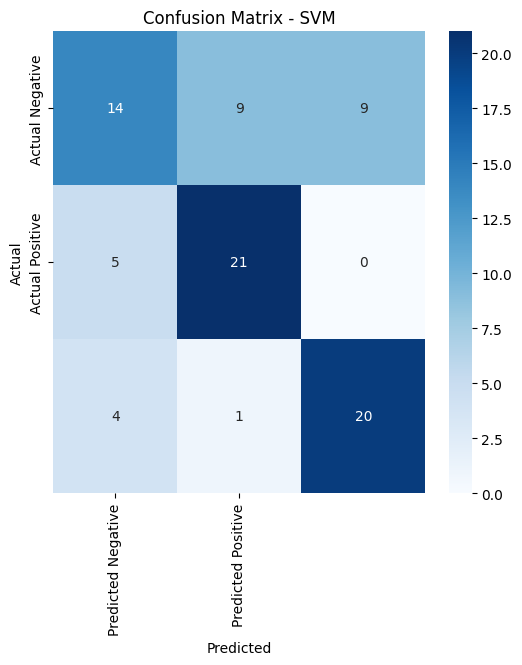

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix - Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualisasi Confusion Matrix - SVM
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Evaluasi Train Data ---
# Untuk Random Forest pada Train Data
y_pred_rf_train = best_rf_model.predict(X_train)
print("Random Forest - Train Classification Report:")
print(classification_report(y_train, y_pred_rf_train))
print("Random Forest - Train Accuracy:", accuracy_score(y_train, y_pred_rf_train))

# Untuk SVM pada Train Data
y_pred_svm_train = best_svm_model.predict(X_train)
print("SVM - Train Classification Report:")
print(classification_report(y_train, y_pred_svm_train))
print("SVM - Train Accuracy:", accuracy_score(y_train, y_pred_svm_train))

# --- Evaluasi Validation Data ---
# Untuk Random Forest pada Validation Data
y_pred_rf_val = best_rf_model.predict(X_val)
print("Random Forest - Validation Classification Report:")
print(classification_report(y_val, y_pred_rf_val))
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_pred_rf_val))

# Untuk SVM pada Validation Data
y_pred_svm_val = best_svm_model.predict(X_val)
print("SVM - Validation Classification Report:")
print(classification_report(y_val, y_pred_svm_val))
print("SVM - Validation Accuracy:", accuracy_score(y_val, y_pred_svm_val))

# --- Evaluasi Test Data ---
# Untuk Random Forest pada Test Data
y_pred_rf_test = best_rf_model.predict(X_test)
print("Random Forest - Test Classification Report:")
print(classification_report(y_test, y_pred_rf_test))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))

# Untuk SVM pada Test Data
y_pred_svm_test = best_svm_model.predict(X_test)
print("SVM - Test Classification Report:")
print(classification_report(y_test, y_pred_svm_test))
print("SVM - Test Accuracy:", accuracy_score(y_test, y_pred_svm_test))

# --- Confusion Matrix ---
# Confusion Matrix untuk Random Forest
print("Confusion Matrix - Random Forest (Test):")
print(confusion_matrix(y_test, y_pred_rf_test))

# Confusion Matrix untuk SVM
print("Confusion Matrix - SVM (Test):")
print(confusion_matrix(y_test, y_pred_svm_test))


Random Forest - Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.99      0.96      0.98       224
           2       0.97      0.99      0.98       221

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660

Random Forest - Train Accuracy: 0.9742424242424242
SVM - Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       215
           1       0.92      0.88      0.90       224
           2       0.89      0.87      0.88       221

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660

SVM - Train Accuracy: 0.8666666666666667
Random Forest - Validation Classification Report:
              pr